![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 6.1 Basic Functional Programming in Python

This tutorial transforms the R functional programming concepts into their Python equivalents, focusing on practical applications for data science. We'll cover core functional programming patterns using Python's built-in tools and popular libraries like `pandas`, `numpy`, and `toolz`.

## Introduction to Functional Programming in Python

Functional programming (FP) emphasizes:
- **Pure functions**: Outputs depend only on inputs, with no side effects
- **Immutability**: Data isn't modified in-place; new objects are created
- **First-class functions**: Functions can be passed as arguments and returned
- **Avoiding loops**: Using higher-order functions instead of explicit iteration

Python doesn't enforce FP principles like Haskell or Scala, but it provides excellent tools to adopt them.

## Core Python Functional Tools

### 1. `map()` - Apply a function to every element

The `map()` function applies a given function to each item of an iterable and returns a map object (iterator).

In [2]:
# Basic usage
numbers = [1, 2, 3, 4, 5]
squared = list(map(lambda x: x**2, numbers))
print(squared)  # [1, 4, 9, 16, 25]

# With named function
def square(x):
    return x**2

squared = list(map(square, numbers))
print(squared)  # [1, 4, 9, 16, 25]

# Multiple iterables
list1 = [1, 2, 3]
list2 = [10, 20, 30]
summed = list(map(lambda x, y: x + y, list1, list2))
print(summed)  # [11, 22, 33]

[1, 4, 9, 16, 25]
[1, 4, 9, 16, 25]
[11, 22, 33]


### 2. `filter()` - Select elements based on a condition

`filter()` creates an iterator from elements of an iterable for which a function returns True.

In [3]:
# Filter even numbers
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
evens = list(filter(lambda x: x % 2 == 0, numbers))
print(evens)  # [2, 4, 6, 8, 10]

# Filter strings by length
words = ["apple", "cat", "elephant", "dog", "butterfly"]
long_words = list(filter(lambda word: len(word) > 4, words))
print(long_words)  # ['apple', 'elephant', 'butterfly']

# Using a named function
def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

primes = list(filter(is_prime, range(20)))
print(primes)  # [2, 3, 5, 7, 11, 13, 17, 19]

[2, 4, 6, 8, 10]
['apple', 'elephant', 'butterfly']
[2, 3, 5, 7, 11, 13, 17, 19]


### 3. `reduce()` - Aggregate values

`reduce()` applies a function cumulatively to the items of an iterable, reducing it to a single value. It's in the `functools` module.

In [4]:
from functools import reduce

# Sum all numbers
numbers = [1, 2, 3, 4, 5]
total = reduce(lambda x, y: x + y, numbers)
print(total)  # 15

# Find maximum
max_val = reduce(lambda x, y: x if x > y else y, numbers)
print(max_val)  # 5

# Product of all numbers
product = reduce(lambda x, y: x * y, numbers)
print(product)  # 120

# Using operator for cleaner code
import operator
total = reduce(operator.add, numbers)
product = reduce(operator.mul, numbers)
print(f"Sum: {total}, Product: {product}")  # Sum: 15, Product: 120

15
5
120
Sum: 15, Product: 120


### 4. List Comprehensions - Pythonic alternatives

While not strictly FP, list comprehensions are often more readable than `map()`/`filter()`.

In [5]:
numbers = [1, 2, 3, 4, 5]

# Equivalent to map()
squared = [x**2 for x in numbers]
print(squared)  # [1, 4, 9, 16, 25]

# Equivalent to filter()
evens = [x for x in numbers if x % 2 == 0]
print(evens)  # [2, 4]

# Both map and filter
even_squares = [x**2 for x in numbers if x % 2 == 0]
print(even_squares)  # [4, 16]

# Nested comprehensions
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
flattened = [item for row in matrix for item in row]
print(flattened)  # [1, 2, 3, 4, 5, 6, 7, 8, 9]

[1, 4, 9, 16, 25]
[2, 4]
[4, 16]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


## Working with Pandas DataFrames

Pandas integrates well with functional programming concepts through methods like `apply()`, `map()`, and vectorized operations.

In [6]:
import pandas as pd
import numpy as np

# Create sample data
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'Diana'],
    'age': [25, 30, 35, 28],
    'salary': [50000, 60000, 75000, 55000],
    'department': ['IT', 'HR', 'IT', 'Finance']
})

print("Original DataFrame:")
print(df)

Original DataFrame:
      name  age  salary department
0    Alice   25   50000         IT
1      Bob   30   60000         HR
2  Charlie   35   75000         IT
3    Diana   28   55000    Finance


### 1. apply() - Apply function to rows or columns

In [9]:
# Column-wise operation
df['salary_increase'] = df['salary'].apply(lambda x: x * 1.1)
print("\nAfter salary increase:")
print(df[['name', 'salary', 'salary_increase']])

# Row-wise operation
def calculate_bonus(row):
    bonus = row['salary'] * 0.05
    if row['age'] > 30:
        bonus += 1000
    return bonus

df['bonus'] = df.apply(calculate_bonus, axis=1)
print("\nWith bonus calculation:")
print(df[['name', 'age', 'salary', 'bonus']])  # Fixed: changed 'bonus"] to 'bonus']


After salary increase:
      name  salary  salary_increase
0    Alice   50000          55000.0
1      Bob   60000          66000.0
2  Charlie   75000          82500.0
3    Diana   55000          60500.0

With bonus calculation:
      name  age  salary   bonus
0    Alice   25   50000  2500.0
1      Bob   30   60000  3000.0
2  Charlie   35   75000  4750.0
3    Diana   28   55000  2750.0


### 2. map() - Apply function to Series (like lapply/sapply)

In [11]:
# Using map()
df['department_upper'] = df['department'].map(str.upper)
df['is_senior'] = df['age'].map(lambda x: x >= 30)
print("\nUsing map():")
print(df[['name', 'department', 'department_upper', 'age', 'is_senior']])


Using map():
      name department department_upper  age  is_senior
0    Alice         IT               IT   25      False
1      Bob         HR               HR   30       True
2  Charlie         IT               IT   35       True
3    Diana    Finance          FINANCE   28      False


### 3. Vectorized operations (most efficient)

In [13]:
# Vectorized operations (fastest)
df['salary_per_year_exp'] = df['salary'] / df['age']  # Element-wise division
df['log_salary'] = np.log(df['salary'])  # NumPy vectorized function
print("\nVectorized operations:")
print(df[['name', 'salary', 'salary_per_year_exp', 'log_salary']])


Vectorized operations:
      name  salary  salary_per_year_exp  log_salary
0    Alice   50000          2000.000000   10.819778
1      Bob   60000          2000.000000   11.002100
2  Charlie   75000          2142.857143   11.225243
3    Diana   55000          1964.285714   10.915088


## Advanced Pandas Functional Patterns

### GroupBy Operations (Like tapply)

In [14]:
# Group by department and calculate statistics
grouped_stats = df.groupby('department').agg({
    'age': ['mean', 'std', 'min', 'max'],
    'salary': ['mean', 'median', 'count']
}).round(2)

print("Grouped statistics:")
print(grouped_stats)

# More complex grouping with custom functions
def salary_range(series):
    return series.max() - series.min()

dept_summary = df.groupby('department').agg(
    avg_age=('age', 'mean'),
    salary_range=('salary', salary_range),
    num_employees=('name', 'count')
).round(2)

print("\nCustom groupby summary:")
print(dept_summary)

Grouped statistics:
             age                 salary               
            mean   std min max     mean   median count
department                                            
Finance     28.0   NaN  28  28  55000.0  55000.0     1
HR          30.0   NaN  30  30  60000.0  60000.0     1
IT          30.0  7.07  25  35  62500.0  62500.0     2

Custom groupby summary:
            avg_age  salary_range  num_employees
department                                      
Finance        28.0             0              1
HR             30.0             0              1
IT             30.0         25000              2


### Conditional Operations (Like keep/discard)

In [15]:
# Filter rows (equivalent to keep)
high_earners = df[df['salary'] > 60000]
print("High earners (salary > 60k):")
print(high_earners)

# Filter with multiple conditions
senior_high_earners = df[(df['age'] >= 30) & (df['salary'] > 55000)]
print("\nSenior high earners:")
print(senior_high_earners)

# Exclude rows (equivalent to discard)
not_it_department = df[df['department'] != 'IT']
print("\nNon-IT employees:")
print(not_it_department)

High earners (salary > 60k):
      name  age  salary department  salary_increase   bonus department_upper  \
2  Charlie   35   75000         IT          82500.0  4750.0               IT   

   is_senior  salary_per_year_exp  log_salary  
2       True          2142.857143   11.225243  

Senior high earners:
      name  age  salary department  salary_increase   bonus department_upper  \
1      Bob   30   60000         HR          66000.0  3000.0               HR   
2  Charlie   35   75000         IT          82500.0  4750.0               IT   

   is_senior  salary_per_year_exp  log_salary  
1       True          2000.000000   11.002100  
2       True          2142.857143   11.225243  

Non-IT employees:
    name  age  salary department  salary_increase   bonus department_upper  \
1    Bob   30   60000         HR          66000.0  3000.0               HR   
3  Diana   28   55000    Finance          60500.0  2750.0          FINANCE   

   is_senior  salary_per_year_exp  log_salary  
1    

## The Power of Chaining: Functional Pipelines

Python's pipe operator (`|`) was introduced in Python 3.11, but we can create similar pipelines with method chaining:

In [16]:
# Complex data transformation pipeline
result = (df
    .assign(salary_increase=lambda x: x['salary'] * 1.1)
    .query('age >= 25')  # filter equivalent
    .groupby('department')
    .agg({
        'salary_increase': ['mean', 'std'],
        'age': 'mean'
    })
    .round(2)
    .reset_index()
)

print("Pipeline result:")
print(result)

Pipeline result:
  department salary_increase             age
                        mean       std  mean
0    Finance         60500.0       NaN  28.0
1         HR         66000.0       NaN  30.0
2         IT         68750.0  19445.44  30.0


## Real-World Example: Processing Multiple Files

Let's recreate the cancer mortality analysis example from the R tutorial using Python.

In [17]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import re
import matplotlib.pyplot as plt
import seaborn as sns

# For this example, let's create synthetic data similar to the R example
np.random.seed(42)
years = list(range(1998, 2011))
data_rows = []

for year in years:
    n_counties = 1000  # Simulate ~1000 counties per year
    for _ in range(n_counties):
        row = {
            'Year': year,
            'SMOKING': np.random.normal(20, 5),  # % smoking prevalence
            'POVERTY': np.random.normal(15, 4),   # % poverty
            'PM25': np.random.normal(12, 3),      # PM2.5 concentration
            'NO2': np.random.normal(25, 6),       # NO2 concentration
            'SO2': np.random.normal(8, 2),        # SO2 concentration
            'RATE': np.random.normal(60, 15)      # Cancer mortality rate
        }
        data_rows.append(row)

# Create DataFrame
data = pd.DataFrame(data_rows)
print(f"Data shape: {data.shape}")
print(data.head())

Data shape: (13000, 7)
   Year    SMOKING    POVERTY       PM25        NO2       SO2       RATE
0  1998  22.483571  14.446943  13.943066  34.138179  7.531693  56.487946
1  1998  27.896064  18.069739  10.591577  28.255360  7.073165  53.014054
2  1998  21.209811   7.346879   6.825247  21.626275  5.974338  64.713710
3  1998  15.459880   9.350785  16.396946  23.645342  8.135056  38.628777
4  1998  17.278086  15.443690   8.547019  27.254188  6.798723  55.624594


In [ ]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import re
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('https://github.com/zia207/Python_for_Beginners/raw/refs/heads/main/Data/data_1998_2010_long_lbc.csv')
print(f"Data shape: {data.shape}")
print(data.head())

Data shape: (46605, 10)
   FIPS           X           Y  Year  SMOKING  POVERTY   PM25   NO2    SO2  \
0  1001  872679.179  1094432.99  1998     27.0     11.3  17.08  1.38  0.057   
1  1001  872679.179  1094432.99  1999     26.0     11.4  15.38  1.04  0.055   
2  1001  872679.179  1094432.99  2000     26.0     10.5  14.04  1.47  0.054   
3  1001  872679.179  1094432.99  2001     26.5     10.8  13.87  1.74  0.051   
4  1001  872679.179  1094432.99  2002     26.6     10.3  14.85  1.10  0.052   

    RATE  
0  90.63  
1  90.39  
2  89.47  
3  89.30  
4  89.15  


### Writing Multiple Files (Walk equivalent)

In [24]:
def write_yearly_files(data, output_dir="output"):
    """Write separate CSV files for each year (equivalent to purrr::walk)"""
    Path(output_dir).mkdir(exist_ok=True)
    
    # Get unique years
    unique_years = data['Year'].unique()
    
    for year in unique_years:
        year_data = data[data['Year'] == year]
        filename = f"{output_dir}/data_{year}.csv"
        year_data.to_csv(filename, index=False)
        print(f"Written file: {filename}")

# Write files
write_yearly_files(data)

# Verify files were created
files = sorted(Path("output").glob("data_*.csv"))
print(f"\nCreated {len(files)} files:")
for f in files:
    print(f"  {f.name}")

Written file: output/data_1998.csv
Written file: output/data_1999.csv
Written file: output/data_2000.csv
Written file: output/data_2001.csv
Written file: output/data_2002.csv
Written file: output/data_2003.csv
Written file: output/data_2004.csv
Written file: output/data_2005.csv
Written file: output/data_2006.csv
Written file: output/data_2007.csv
Written file: output/data_2008.csv
Written file: output/data_2009.csv
Written file: output/data_2010.csv
Written file: output/data_2011.csv
Written file: output/data_2012.csv

Created 15 files:
  data_1998.csv
  data_1999.csv
  data_2000.csv
  data_2001.csv
  data_2002.csv
  data_2003.csv
  data_2004.csv
  data_2005.csv
  data_2006.csv
  data_2007.csv
  data_2008.csv
  data_2009.csv
  data_2010.csv
  data_2011.csv
  data_2012.csv


### Reading Multiple Files into a Dictionary

In [25]:
def load_yearly_data(directory="output"):
    """Load all yearly CSV files into a dictionary (equivalent to purrr::map)"""
    files = sorted(Path(directory).glob("data_*.csv"))
    
    # Extract years from filenames using regex
    year_pattern = r"data_(\d{4})\.csv"
    data_dict = {}
    
    for file_path in files:
        match = re.search(year_pattern, file_path.name)
        if match:
            year = int(match.group(1))
            df = pd.read_csv(file_path)
            data_dict[year] = df
    
    return data_dict

# Load data
data_list = load_yearly_data()
print(f"Loaded {len(data_list)} years of data")
print(f"Years available: {sorted(data_list.keys())}")

Loaded 15 years of data
Years available: [1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]


### Descriptive Statistics (Like compute_descriptive_stats)

In [26]:
def compute_descriptive_stats(df, year):
    """
    Compute descriptive statistics for numeric columns
    Similar to the R function using dplyr and tidyr
    """
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Calculate statistics
    stats = {}
    for col in numeric_cols:
        col_data = df[col].dropna()  # Remove NaN values
        
        mean_val = np.mean(col_data)
        std_val = np.std(col_data, ddof=1)  # Sample standard deviation
        n = len(col_data)
        
        # Calculate 95% CI (t-distribution approximation)
        if n > 1:
            t_critical = 1.96  # Approximation for large samples
            margin_error = t_critical * (std_val / np.sqrt(n))
            ci_lower = mean_val - margin_error
            ci_upper = mean_val + margin_error
        else:
            ci_lower = ci_upper = np.nan
        
        stats[col] = {
            'Min': np.min(col_data),
            'Max': np.max(col_data),
            'Mean': mean_val,
            'CI_lower': ci_lower,
            'CI_upper': ci_upper
        }
    
    # Convert to DataFrame
    stats_df = pd.DataFrame(stats).T.reset_index()
    stats_df.columns = ['Variable', 'Min', 'Max', 'Mean', 'CI_lower', 'CI_upper']
    stats_df['Year'] = year
    
    return stats_df

# Apply to all years
desc_stats_list = []
for year, df in data_list.items():
    stats_df = compute_descriptive_stats(df, year)
    desc_stats_list.append(stats_df)

# Combine all results
desc_stats_table = pd.concat(desc_stats_list, ignore_index=True)
desc_stats_table = desc_stats_table.round(3)

print("Descriptive Statistics Table:")
print(desc_stats_table.head(10))

Descriptive Statistics Table:
  Variable          Min          Max         Mean     CI_lower     CI_upper  \
0     FIPS     1001.000    56045.000    30666.868    30140.000    31193.736   
1        X -2303830.436  2200344.806   387333.697   353370.255   421297.140   
2        Y   343702.668  3126214.373  1761335.864  1741670.591  1781001.136   
3     Year     1998.000     1998.000     1998.000     1998.000     1998.000   
4  SMOKING       11.800       37.100       26.637       26.517       26.758   
5  POVERTY        1.800       43.800       14.674       14.467       14.881   
6     PM25        1.380       26.050       12.821       12.646       12.996   
7      NO2        0.130       21.370        2.038        1.978        2.098   
8      SO2        0.000        0.632        0.059        0.056        0.062   
9     RATE       17.370      211.030       68.850       68.296       69.404   

   Year  
0  1998  
1  1998  
2  1998  
3  1998  
4  1998  
5  1998  
6  1998  
7  1998  
8  1998  


### Correlation Analysis (Like compute_correlations)

In [27]:
def compute_correlations(df, year):
    """
    Compute correlation between RATE and other variables
    """
    predictors = ['SMOKING', 'POVERTY', 'PM25', 'NO2', 'SO2']
    correlations = []
    
    for predictor in predictors:
        # Drop NA values for both variables
        valid_data = df[[predictor, 'RATE']].dropna()
        
        if len(valid_data) > 1:
            # Pearson correlation coefficient
            r = np.corrcoef(valid_data[predictor], valid_data['RATE'])[0, 1]
            
            # Simple p-value approximation (not exact, for illustration)
            n = len(valid_data)
            if abs(r) < 1:
                t_stat = r * np.sqrt((n - 2) / (1 - r**2))
                # Approximate p-value using normal distribution for large n
                from scipy.stats import norm
                p_value = 2 * (1 - norm.cdf(abs(t_stat)))
            else:
                p_value = 0
            
            correlations.append({
                'Variable': predictor,
                'r': r,
                'p_value': p_value
            })
    
    result_df = pd.DataFrame(correlations)
    result_df['Year'] = year
    return result_df

# Apply to all years
correlation_list = []
for year, df in data_list.items():
    corr_df = compute_correlations(df, year)
    correlation_list.append(corr_df)

cor_table = pd.concat(correlation_list, ignore_index=True)
cor_table = cor_table.round(3)

print("Correlation Table (RATE vs Predictors):")
print(cor_table.head(15))

Correlation Table (RATE vs Predictors):
   Variable      r  p_value  Year
0   SMOKING  0.711      0.0  1998
1   POVERTY  0.325      0.0  1998
2      PM25  0.512      0.0  1998
3       NO2  0.204      0.0  1998
4       SO2  0.327      0.0  1998
5   SMOKING  0.719      0.0  1999
6   POVERTY  0.353      0.0  1999
7      PM25  0.517      0.0  1999
8       NO2  0.185      0.0  1999
9       SO2  0.331      0.0  1999
10  SMOKING  0.722      0.0  2000
11  POVERTY  0.355      0.0  2000
12     PM25  0.485      0.0  2000
13      NO2  0.166      0.0  2000
14      SO2  0.332      0.0  2000


### Correlation Matrix Plots

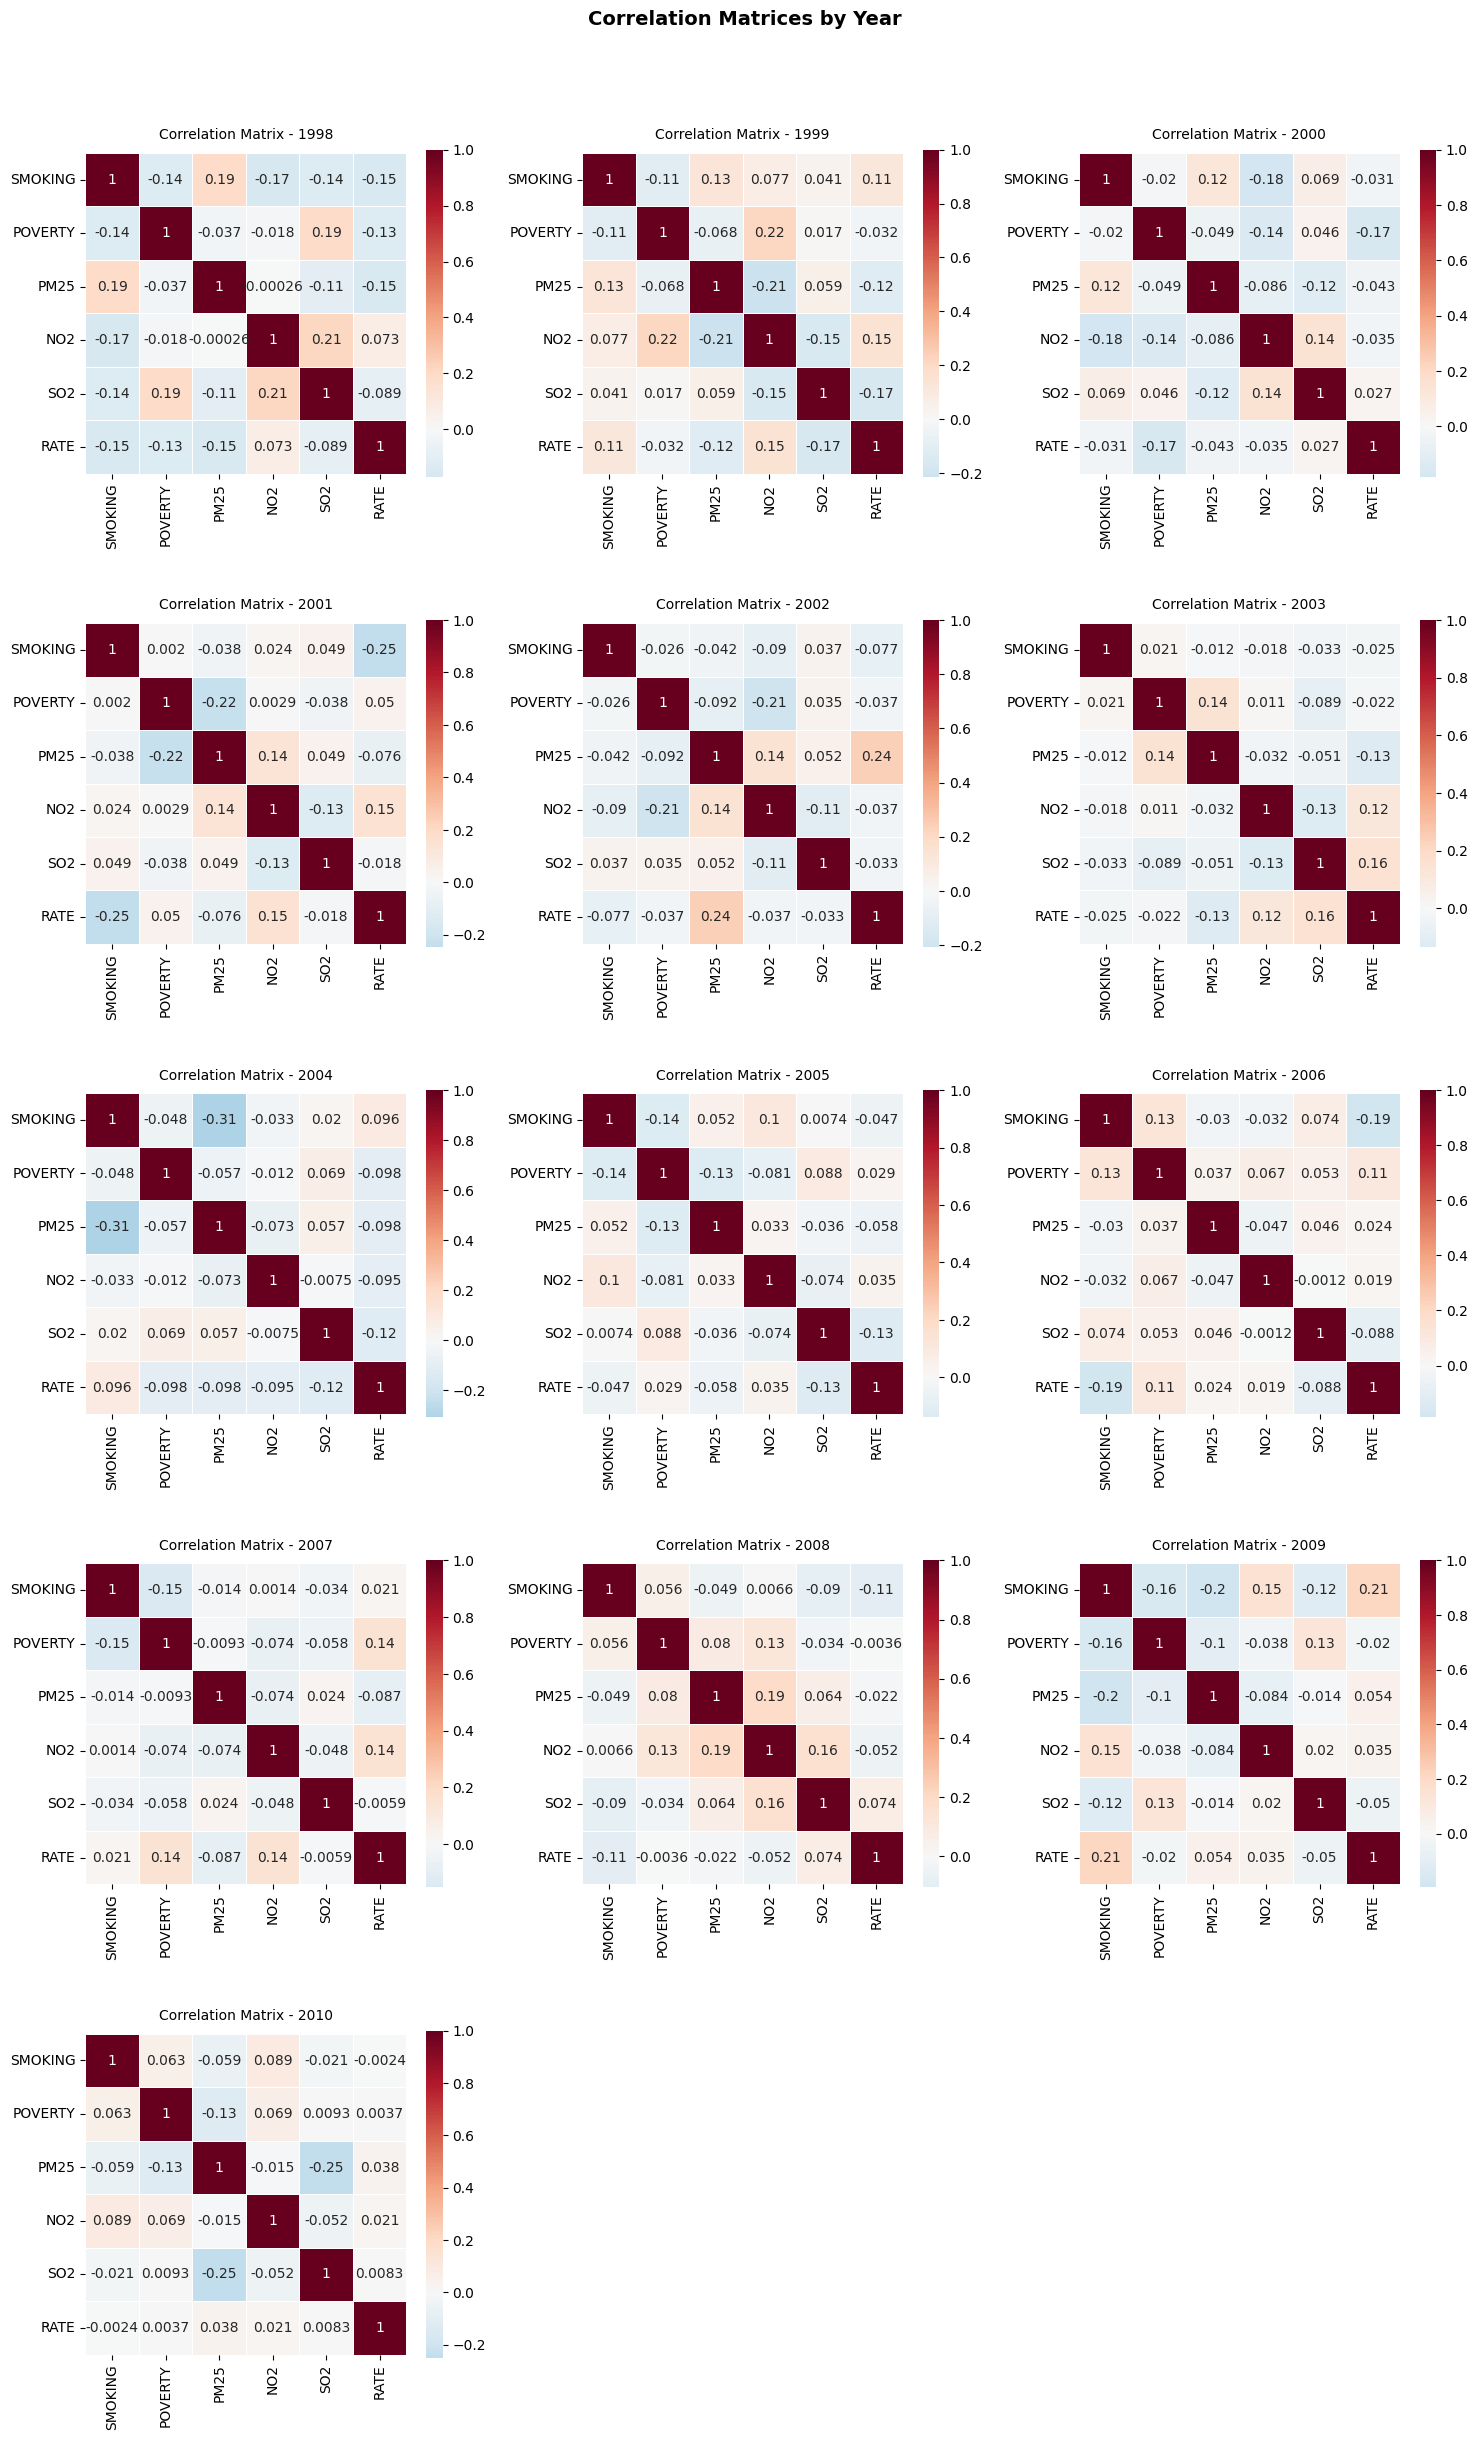

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --- Correlation function ---
def create_correlation_plot(df, year, ax=None):
    """
    Create a correlation matrix heatmap on the provided axis.
    If ax is None, creates a new subplot.
    """
    # Select only numeric columns for correlation
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    corr_matrix = df[numeric_cols].corr()
    
    # Plot on the provided axis
    sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)
    ax.set_title(f'Correlation Matrix - {year}', fontsize=10, pad=10)
    return ax

# --- Load data (assuming you have this from earlier) ---
# Example: load_yearly_data() or similar — replace with your actual loader
# data_list = load_yearly_data()  # <- This should be defined elsewhere

# For demonstration, let's simulate some data:
np.random.seed(42)
years = list(range(1998, 2011))
data_list = {}
for year in years:
    n = 100
    data_list[year] = pd.DataFrame({
        'SMOKING': np.random.normal(20, 5, n),
        'POVERTY': np.random.normal(15, 4, n),
        'PM25': np.random.normal(12, 3, n),
        'NO2': np.random.normal(25, 6, n),
        'SO2': np.random.normal(8, 2, n),
        'RATE': np.random.normal(60, 15, n)
    })

# --- Create grid of all plots ---
n_plots = len(data_list)
n_col = 3
n_row = (n_plots + n_col - 1) // n_col  # Ceiling division

fig, axes = plt.subplots(n_row, n_col, figsize=(15, 5 * n_row))
fig.suptitle('Correlation Matrices by Year', fontsize=14, fontweight='bold', y=0.98)

# Flatten axes array for easy indexing
axes_flat = axes.flatten() if n_row > 1 else axes if n_col > 1 else [axes]

# Generate each correlation plot
for i, (year, df) in enumerate(data_list.items()):
    ax = axes_flat[i]
    create_correlation_plot(df, year, ax=ax)

# Hide unused subplots
for i in range(len(data_list), len(axes_flat)):
    axes_flat[i].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle

# Display the combined plot
plt.show()

# Optional: Save the figure
# plt.savefig("correlation_matrices_panel.png", dpi=300, bbox_inches='tight')

### Regression Analysis (Multiple Linear Regression)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def fit_linear_regression(df, year):
    """
    Fit multiple linear regression: RATE ~ SMOKING + POVERTY + PM25 + NO2 + SO2
    """
    # Select predictors and target
    predictors = ['SMOKING', 'POVERTY', 'PM25', 'NO2', 'SO2']
    target = 'RATE'
    
    # Prepare data (remove rows with missing values)
    X = df[predictors].dropna()
    y = df.loc[X.index, target]
    
    # Fit model
    model = LinearRegression()
    model.fit(X, y)
    
    # Get coefficients and R-squared
    coefficients = dict(zip(predictors, model.coef_))
    intercept = model.intercept_
    r_squared = r2_score(y, model.predict(X))
    
    # Create result DataFrame
    result = {
        'Year': year,
        'Intercept': intercept,
        'R_squared': r_squared
    }
    result.update(coefficients)
    
    return result

# Fit models for all years
regression_results = []
for year, df in data_list.items():
    result = fit_linear_regression(df, year)
    regression_results.append(result)

# Convert to DataFrame
results_table = pd.DataFrame(regression_results)
results_table = results_table.round(3)

print("Multiple Linear Regression Results:")
print(results_table)

Multiple Linear Regression Results:
    Year  Intercept  R_squared  SMOKING  POVERTY   PM25    NO2     SO2
0   1998    -14.229      0.572    2.453    0.501  0.721  0.477   2.882
1   1999    -17.122      0.596    2.490    0.515  1.146  0.128   0.739
2   2000    -17.386      0.584    2.520    0.547  0.949  0.534   3.707
3   2001    -17.575      0.606    2.491    0.475  1.215 -0.025   2.817
4   2002    -19.038      0.601    2.519    0.534  1.059  0.256   3.689
5   2003    -17.806      0.617    2.431    0.674  0.981  0.253   7.372
6   2004    -18.467      0.636    2.430    0.554  1.257  0.095   6.033
7   2005    -18.746      0.634    2.521    0.362  1.280  0.229   5.279
8   2006    -19.116      0.625    2.541    0.373  1.343  0.146  11.173
9   2007    -19.145      0.638    2.502    0.336  1.492  0.480   5.074
10  2008    -18.653      0.619    2.597    0.380  1.358  0.313  27.384
11  2009    -19.546      0.616    2.645    0.342  1.329  0.752  41.420
12  2010    -17.423      0.641    2.496  

### Scatter plots

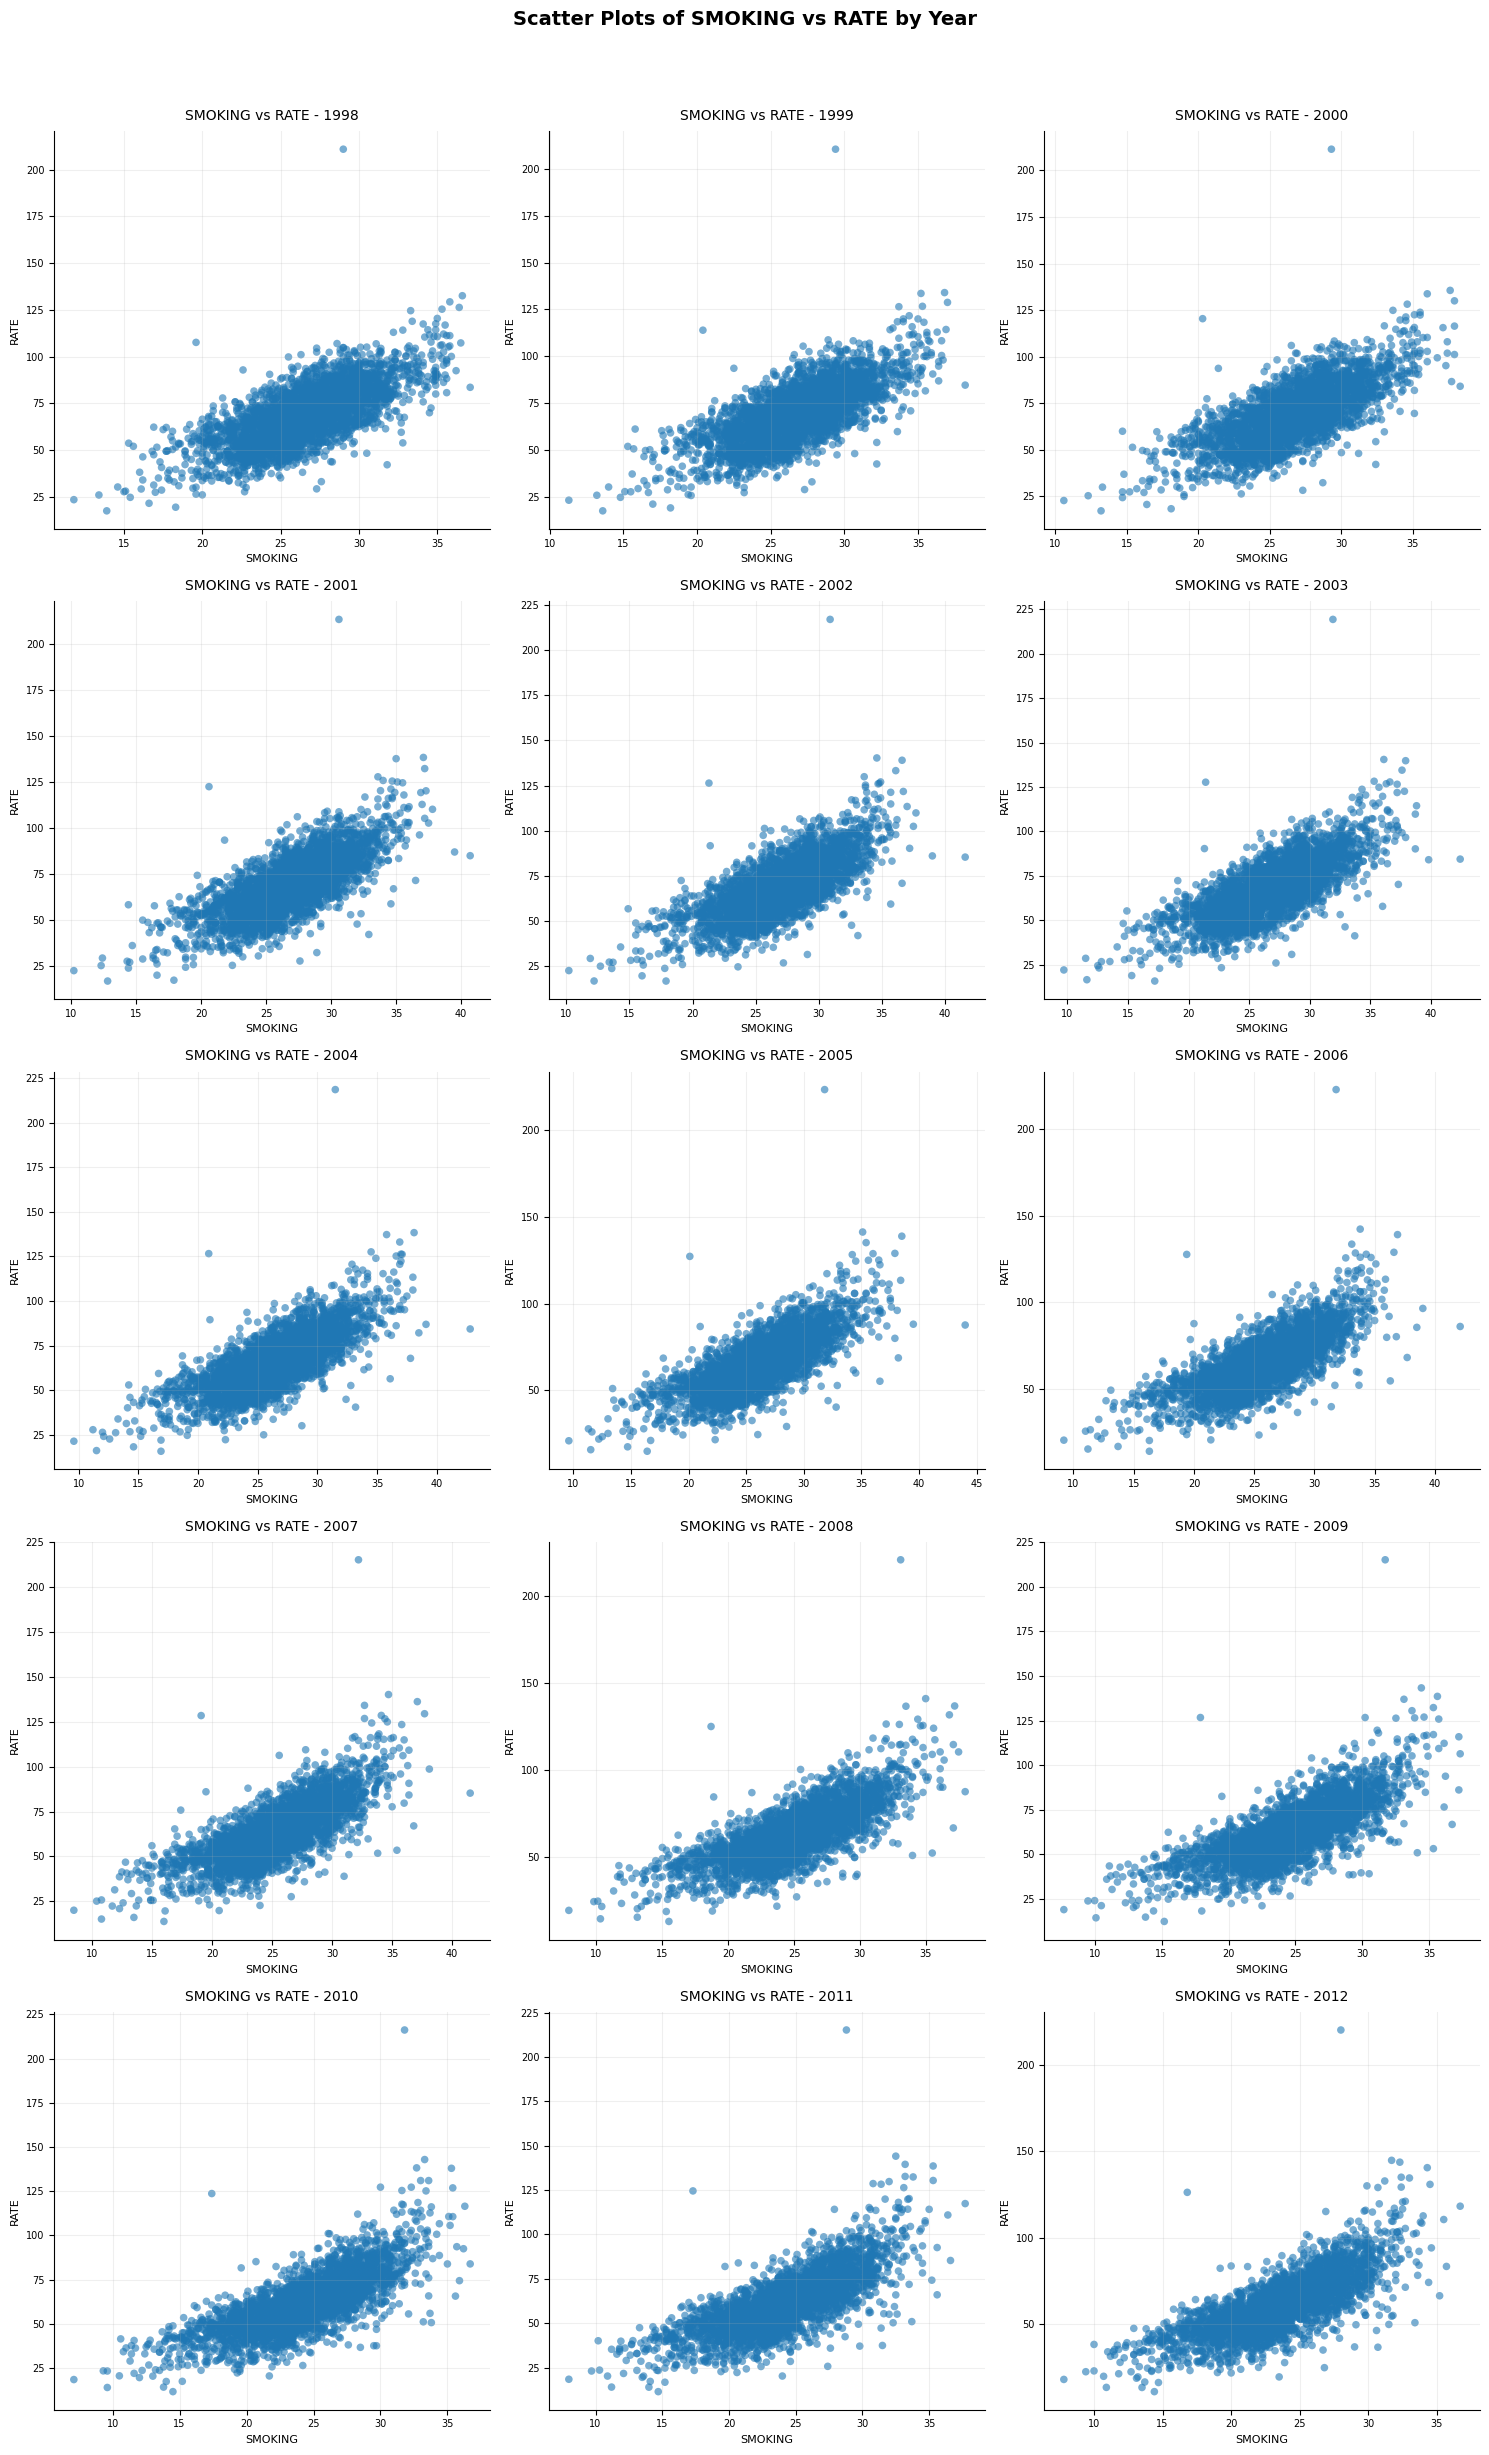

In [44]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from pathlib import Path

# --- Step 1: Load Data ---
def load_yearly_data(directory="output"):
    """Load all yearly CSV files into a dictionary with year as key."""
    files = sorted(Path(directory).glob("data_*.csv"))
    
    year_pattern = r"data_(\d{4})\.csv"
    data_dict = {}
    
    for file_path in files:
        match = re.search(year_pattern, file_path.name)
        if match:
            year = int(match.group(1))
            df = pd.read_csv(file_path)
            data_dict[year] = df
    
    return data_dict

# Load your data (adjust path if needed)
data_list = load_yearly_data()

# Sort years for consistent ordering
sorted_years = sorted(data_list.keys())

# --- Step 2: Define Plot Function ---
def create_scatter_plot(ax, df, year):
    """Create a scatter plot of SMOKING vs RATE on the given axis."""
    ax.scatter(df['SMOKING'], df['RATE'],
               color='#1f77b4', alpha=0.6, s=30, edgecolors='none')
    
    ax.set_title(f'SMOKING vs RATE - {year}', fontsize=10, pad=8)
    ax.set_xlabel('SMOKING', fontsize=8)
    ax.set_ylabel('RATE', fontsize=8)
    ax.tick_params(axis='both', labelsize=7)
    ax.grid(True, alpha=0.2)
    
    # Remove top and right spines for minimal theme
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# --- Step 3: Create Grid of Plots ---
n_plots = len(sorted_years)
n_col = 3
n_row = (n_plots + n_col - 1) // n_col  # Ceiling division

fig, axes = plt.subplots(n_row, n_col, figsize=(15, 5 * n_row))
fig.suptitle('Scatter Plots of SMOKING vs RATE by Year', fontsize=14, fontweight='bold', y=0.98)

# Flatten axes array for easy indexing
axes_flat = axes.flatten() if n_row > 1 else axes if n_col > 1 else [axes]

# Generate each plot
for i, year in enumerate(sorted_years):
    df = data_list[year]
    # Select only required columns
    df_subset = df[['SMOKING', 'RATE']].dropna()
    
    create_scatter_plot(axes_flat[i], df_subset, year)

# Hide unused subplots
for i in range(len(sorted_years), len(axes_flat)):
    axes_flat[i].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle

# Display the combined plot
plt.show()

## Best Practices for Functional Programming in Python

### 1. Keep Functions Pure

In [30]:
# BAD: Side effects inside function
def bad_function(x):
    print(f"Processing: {x}")  # Side effect - printing to console
    return x * 2

# GOOD: Pure function
def good_function(x):
    return x * 2

# Handle side effects outside
values = [1, 2, 3, 4, 5]
results = list(map(good_function, values))
print("Results:", results)  # Print outside the function

Results: [2, 4, 6, 8, 10]


### 2. Embrace Immutability

In [31]:
# BAD: Modifying original data
def bad_transform(df):
    df['new_col'] = df['age'] * 2  # Modifies original DataFrame
    return df

# GOOD: Create new DataFrame
def good_transform(df):
    new_df = df.copy()  # Explicit copy
    new_df['new_col'] = new_df['age'] * 2
    return new_df

# Original data unchanged
original_df = pd.DataFrame({'age': [20, 30, 40]})
transformed_df = good_transform(original_df)
print("Original:", original_df)
print("Transformed:", transformed_df)

Original:    age
0   20
1   30
2   40
Transformed:    age  new_col
0   20       40
1   30       60
2   40       80


### 3. Use Composition for Complex Logic

In [36]:
import pandas as pd
import numpy as np

# Define small, reusable functions
def clean_names(name_series):
    return name_series.str.strip().str.title()

def convert_to_numeric(series):
    return pd.to_numeric(series, errors='coerce')

def normalize_column(series):
    # Remove NaNs for calculation, but preserve structure
    cleaned = series.dropna()
    if len(cleaned) == 0:
        return pd.Series([np.nan] * len(series), index=series.index)
    mean_val = cleaned.mean()
    std_val = cleaned.std()
    if std_val == 0:
        return pd.Series([0] * len(series), index=series.index)
    return (series - mean_val) / std_val

# Compose functions for complex transformations
def process_data(df):
    return (df
        .assign(name=clean_names(df['name']))           # ✅ Creates new 'name'
        .assign(age=convert_to_numeric(df['age']))       # ✅ Creates new 'age' (float with NaN)
        .assign(normalized_age=lambda x: normalize_column(x['age']))  # ✅ NOW use the NEW 'age'!
    )

# Usage
sample_df = pd.DataFrame({
    'name': [' alice ', 'BOB', ' charlie '],
    'age': ['25', '30abc', '35']
})

processed = process_data(sample_df)
print("Processed data:")
print(processed)

Processed data:
      name   age  normalized_age
0    Alice  25.0       -0.707107
1      Bob   NaN             NaN
2  Charlie  35.0        0.707107


## Summary and Conclusion

This tutorial demonstrated how to implement functional programming principles in Python for data science tasks:

### Key Takeaways:

1. **Use vectorized operations** whenever possible (fastest and most Pythonic)
2. **Embrace immutability** by creating new objects rather than modifying existing ones
3. **Keep functions pure** - avoid side effects like printing, file I/O, or global state changes
4. **Chain operations** using method chaining for readable, maintainable code
5. **Use appropriate tools**: `map()`, `filter()`, `reduce()` for basic operations; pandas `apply()`, `groupby()` for data frames

### Benefits of Functional Programming in Python:

- Cleaner, more readable code
- Easier testing (pure functions are deterministic)
- Better parallelization potential
- Fewer bugs due to reduced side effects
- More modular code that's easier to reuse

### When to Avoid Strict FP:

- Performance-critical code where mutation is faster
- Interfacing with external systems requiring side effects
- Very simple scripts where imperative style is clearer

The functional approach shown here scales beautifully to large datasets and complex analyses, making your code more robust, testable, and maintainable—essential qualities for professional data science work.